## 1.download the dataset

## 2.load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df= pd.read_csv(r'C:\Users\ARUL VASAN\Downloads\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3.1 univariate Analysis

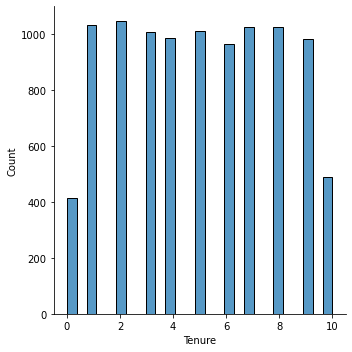

In [4]:
sns.displot(df.Tenure)

## 3.2 Bi-Variate Analysis

<AxesSubplot:>

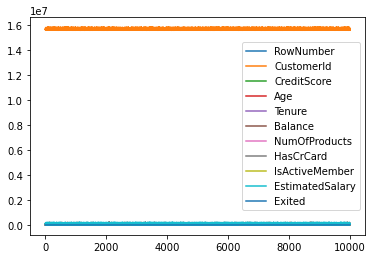

In [5]:
df.plot.line()

## 3.3 multi-Variate Analysis

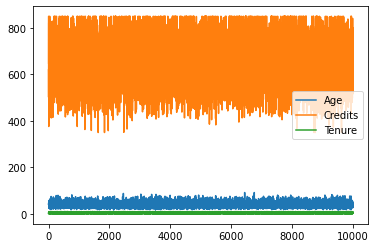

In [8]:
df.Age.plot()
df.CreditScore.plot()
df.Tenure.plot()
plt.legend(['Age','Credits','Tenure'])

## 4. Perform descriptive statistics on the dataset.

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle the Missing values.

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## 6. Find the outliers and replace the outliers

In [15]:
df["Tenure"] = np.where(df["Tenure"] >10, np.median,df["Tenure"])
df["Tenure"]

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: object

## 7. Check for Categorical columns and perform encoding

In [16]:
pd.get_dummies(df, columns=["Gender", "Age"], prefix=["Age", "Gender"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Gender_78,Gender_79,Gender_80,Gender_81,Gender_82,Gender_83,Gender_84,Gender_85,Gender_88,Gender_92
0,1,15634602,Hargrave,619,France,2,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## 8. Split the data into dependent and independent variables

## 8.1 Split the data into Independent variables

In [18]:
X = df.iloc[:, :-2].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 1]
 [2 15647311 'Hill' ... 1 0 1]
 [3 15619304 'Onio' ... 3 1 0]
 ...
 [9998 15584532 'Liu' ... 1 0 1]
 [9999 15682355 'Sabbatini' ... 2 1 0]
 [10000 15628319 'Walker' ... 1 1 0]]


## 8.2 Split the data into Dependent variables

In [20]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ARUL VASAN\Downloads\Churn_Modelling.csv')
Y = df.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


## 9. Scale the independent variables

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [22]:
df[["RowNumber"]]=scaler.fit_transform(df[["RowNumber"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0        0.0000    15634602   Hargrave          619    France  Female   42   
1        0.0001    15647311       Hill          608     Spain  Female   41   
2        0.0002    15619304       Onio          502    France  Female   42   
3        0.0003    15701354       Boni          699    France  Female   39   
4        0.0004    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995     0.9996    15606229   Obijiaku          771    France    Male   39   
9996     0.9997    15569892  Johnstone          516    France    Male   35   
9997     0.9998    15584532        Liu          709    France  Female   36   
9998     0.9999    15682355  Sabbatini          772   Germany    Male   42   
9999     1.0000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

## 10. Split the data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
train_size=0.8
X = df.drop(columns = ['Tenure']).copy()
y = df['Tenure']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(8000, 13)
(8000,)
(1000, 13)
(1000,)
(1000, 13)
(1000,)


(None, None)